
# Identifikation von Studenten

**Analysen zur Unterscheidung von Studenten und Angehörigen des Hochschulpersonals**

**Zeitraum der aufgezeichneten Log-Einträge**
Mo, 12.10.2020 bis Do, 03.06.2021
Länge des Zeitraums: 7 Monate, 3 Wochen, 2 Tage
Länge in Tagen: 235 Tage
Länge in Wochen: 33 Wochen, 4 Tage

### Import von Bibliotheken und anderen Erweiterungen

In [141]:
from sqlalchemy import create_engine
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.core.display_functions import display

### Definitionen zur Darstellung der Visualisierungen

In [142]:
sns.set_theme(style='white', font_scale=1.2, palette='Spectral')

### Import der Originaldaten im CSV-Format (optional)

In [143]:
# file = 'vfh_moodle_ws20.csv'
# moodle_data = pd.read_csv(file, delimiter=';')
# moodle_data

### Herstellung der Verbindung zur MySQL-Datenbank

In [144]:
user = "root"
password = "root"
host = "localhost"
database = "vfh_moodle_ws20"
port = 3306

engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}', pool_recycle=port)
connection = engine.connect()

### Import der Arbeitsdaten aus der MySQL-Datenbank

In [145]:
query = """SELECT * FROM moodle_data"""
moodle_data = pd.read_sql(query, connection) # Definition der Arbeitsdaten

### Datenaufbereitung: Auswahl der Arbeitsdaten

In [146]:
# Konvertierung des Datentyps des Tabellenmerkmals timecreated
moodle_data['timecreated'] = pd.to_datetime(moodle_data['timecreated'], unit='s')

&nbsp;
**Begrenzung der Selektion auf Einzelbenutzer**

In [147]:
# Gegenstand der Untersuchungen sind nur Datensätze mit einer userid größer als 0. Damit werden jene Benutzer bei der Analyse nicht beachtet, die einer
# Beobachtung ihres Verhaltens nicht zugestimmt haben (userid = –2) oder die im Bachelor-Studiengang Medieninformatik Online studierten (userid = –3).
moodle_data = moodle_data[moodle_data.userid > 0]
moodle_data

,courseid,Studiengang,userid,userstatus,relateduserid,relateduserstatus,action,eventname,objecttable,objectid,timecreated,course_module_type,instanceid
0,0,0,1,student,-2,other,sent,\core\event\notification_sent,notifications,3232247,2020-10-12 04:54:03,,0
1,0,0,2,other,-2,other,sent,\core\event\notification_sent,notifications,3233121,2020-10-12 07:19:09,,0
2,0,0,3,other,0,none,loggedin,\core\event\user_loggedin,user,3463,2020-10-12 07:22:31,,0
3,0,0,2,other,-2,other,sent,\core\event\notification_sent,notifications,3233436,2020-10-12 07:48:03,,0
4,0,0,4,other,0,none,loggedin,\core\event\user_loggedin,user,6881,2020-10-12 07:55:19,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
969025,0,0,26,other,26,other,viewed,\core\event\dashboard_viewed,,0,2021-06-03 10:00:41,,0
969026,1750,0,26,other,0,none,viewed,\core\event\course_viewed,,0,2021-06-03 10:00:45,,0
969027,1750,0,26,other,0,none,viewed,\mod_forum\event\course_module_viewed,forum,7082,2021-06-03 10:00:47,,0
969028,1750,0,26,other,0,none,viewed,\mod_forum\event\discussion_viewed,forum_discussions,334595,2021-06-03 10:00:49,,0


### Mengenverteilung aller Actions in der Gesamtbetrachtung

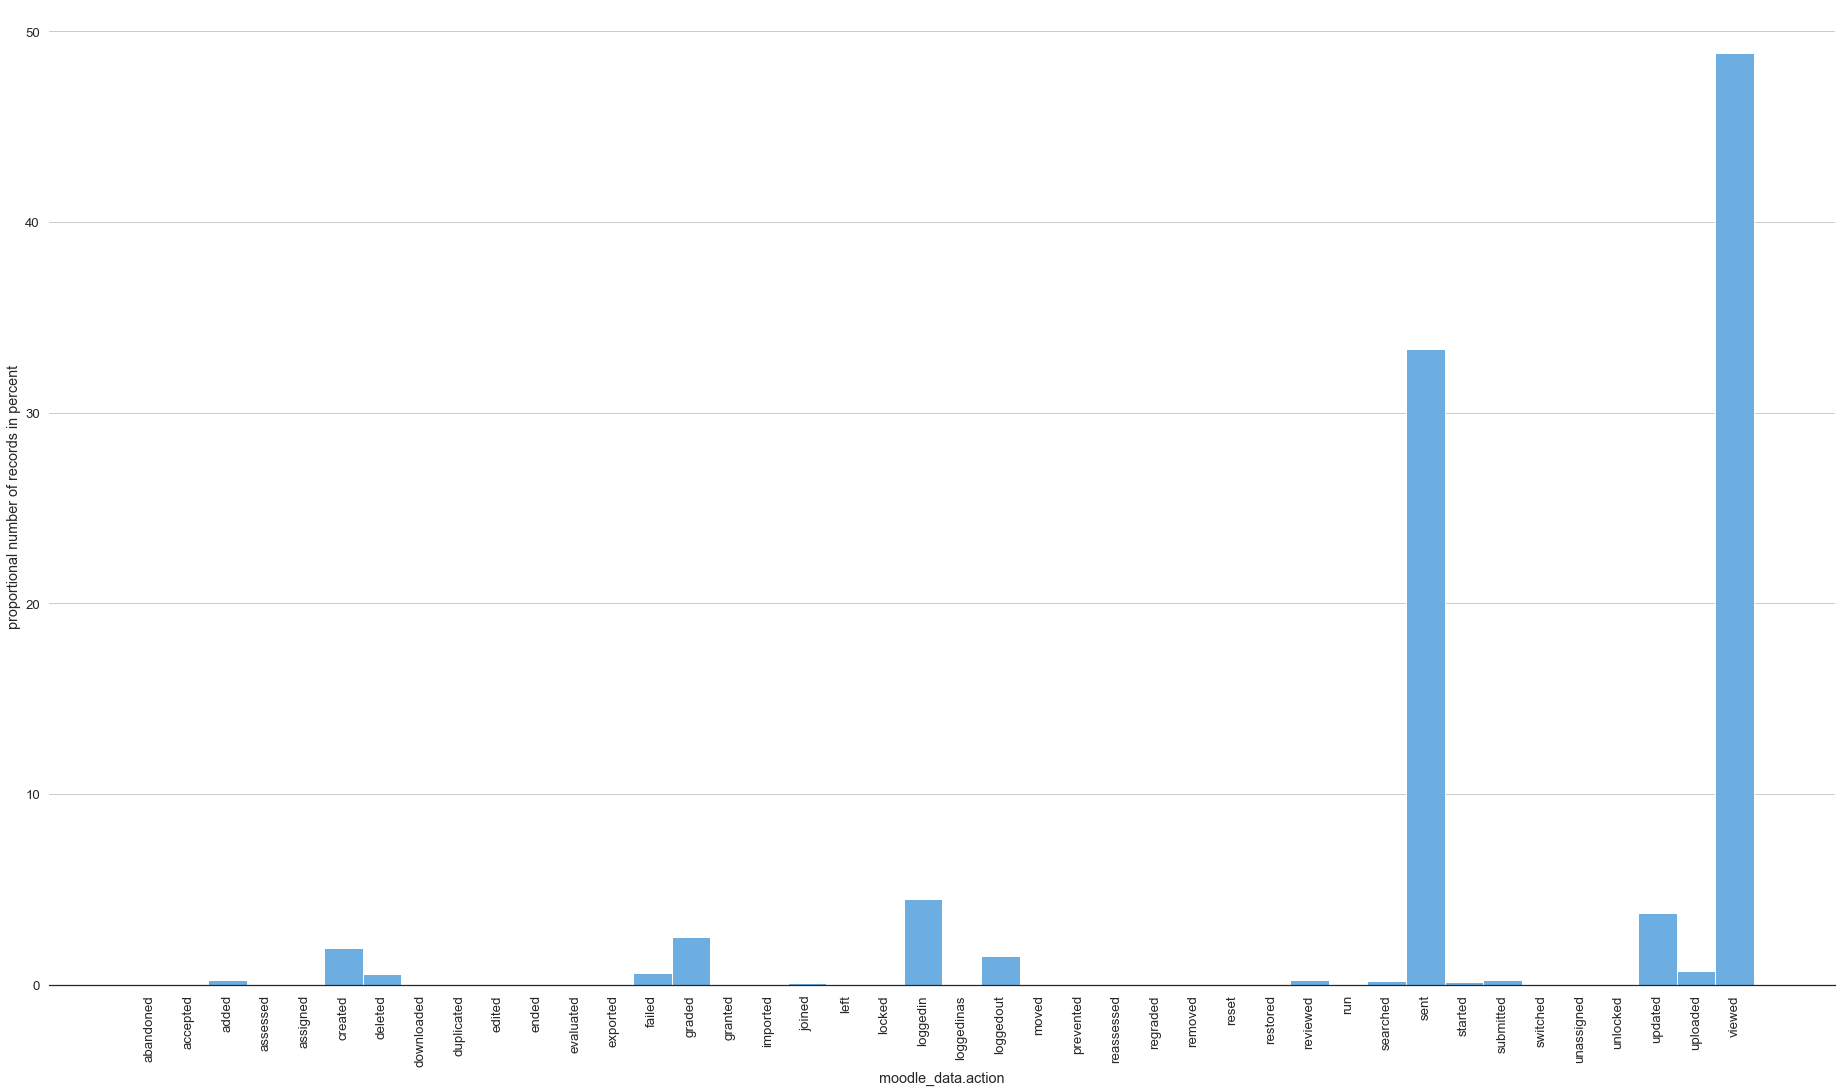

In [148]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(32, 18)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Visualisierung der Mengenverteilung aller Actions in der Gesamtbetrachtung
chart = sns.histplot(data=moodle_data.action.sort_values(), stat='percent', color='#6DAEE2', alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.action')
chart.set_ylabel('proportional number of records in percent')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/Mengenverteilung_Actions_Gesamtbetrachtung.pdf', format='pdf')
plt.show()

### Menge der sent-Actions pro Benutzer

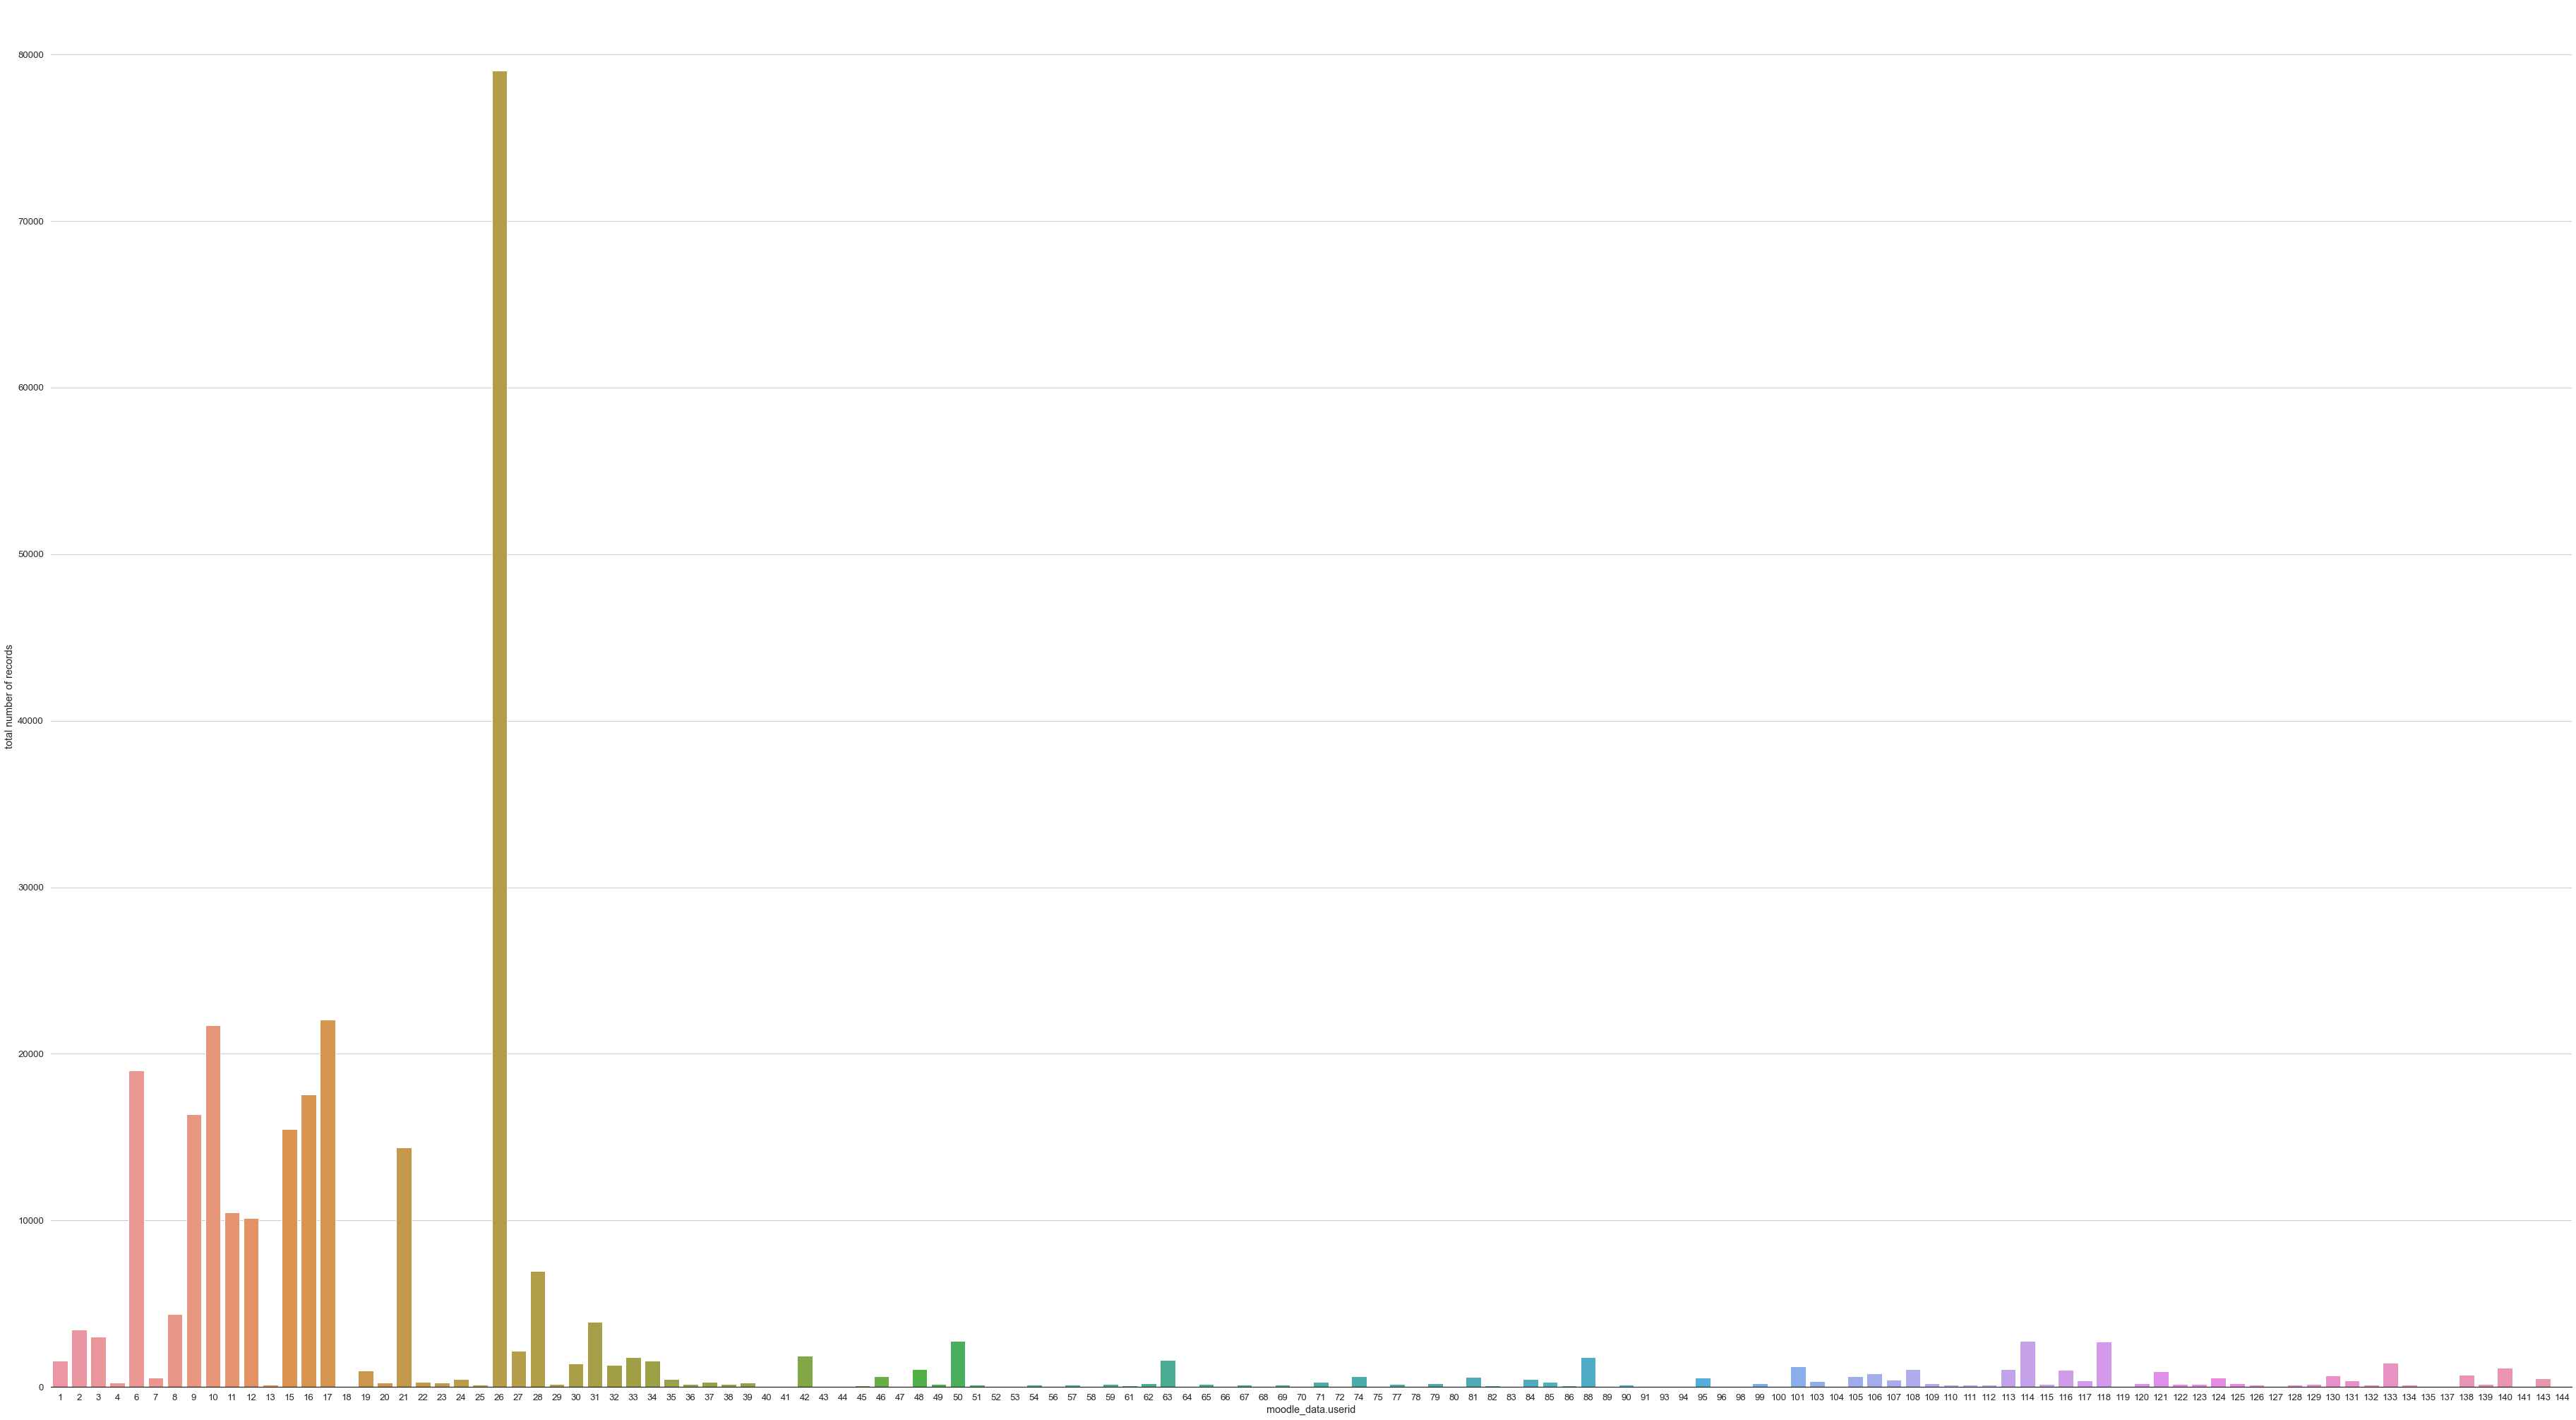

In [149]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(64, 36)) # Größe der Visualisierung (in inch)

# Visualisierung der Menge der sent-Actions pro Benutzer
chart = sns.countplot(x=moodle_data.userid[moodle_data.action == 'sent'], alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.userid')
chart.set_ylabel('total number of records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der viewed-Actions pro Benutzer

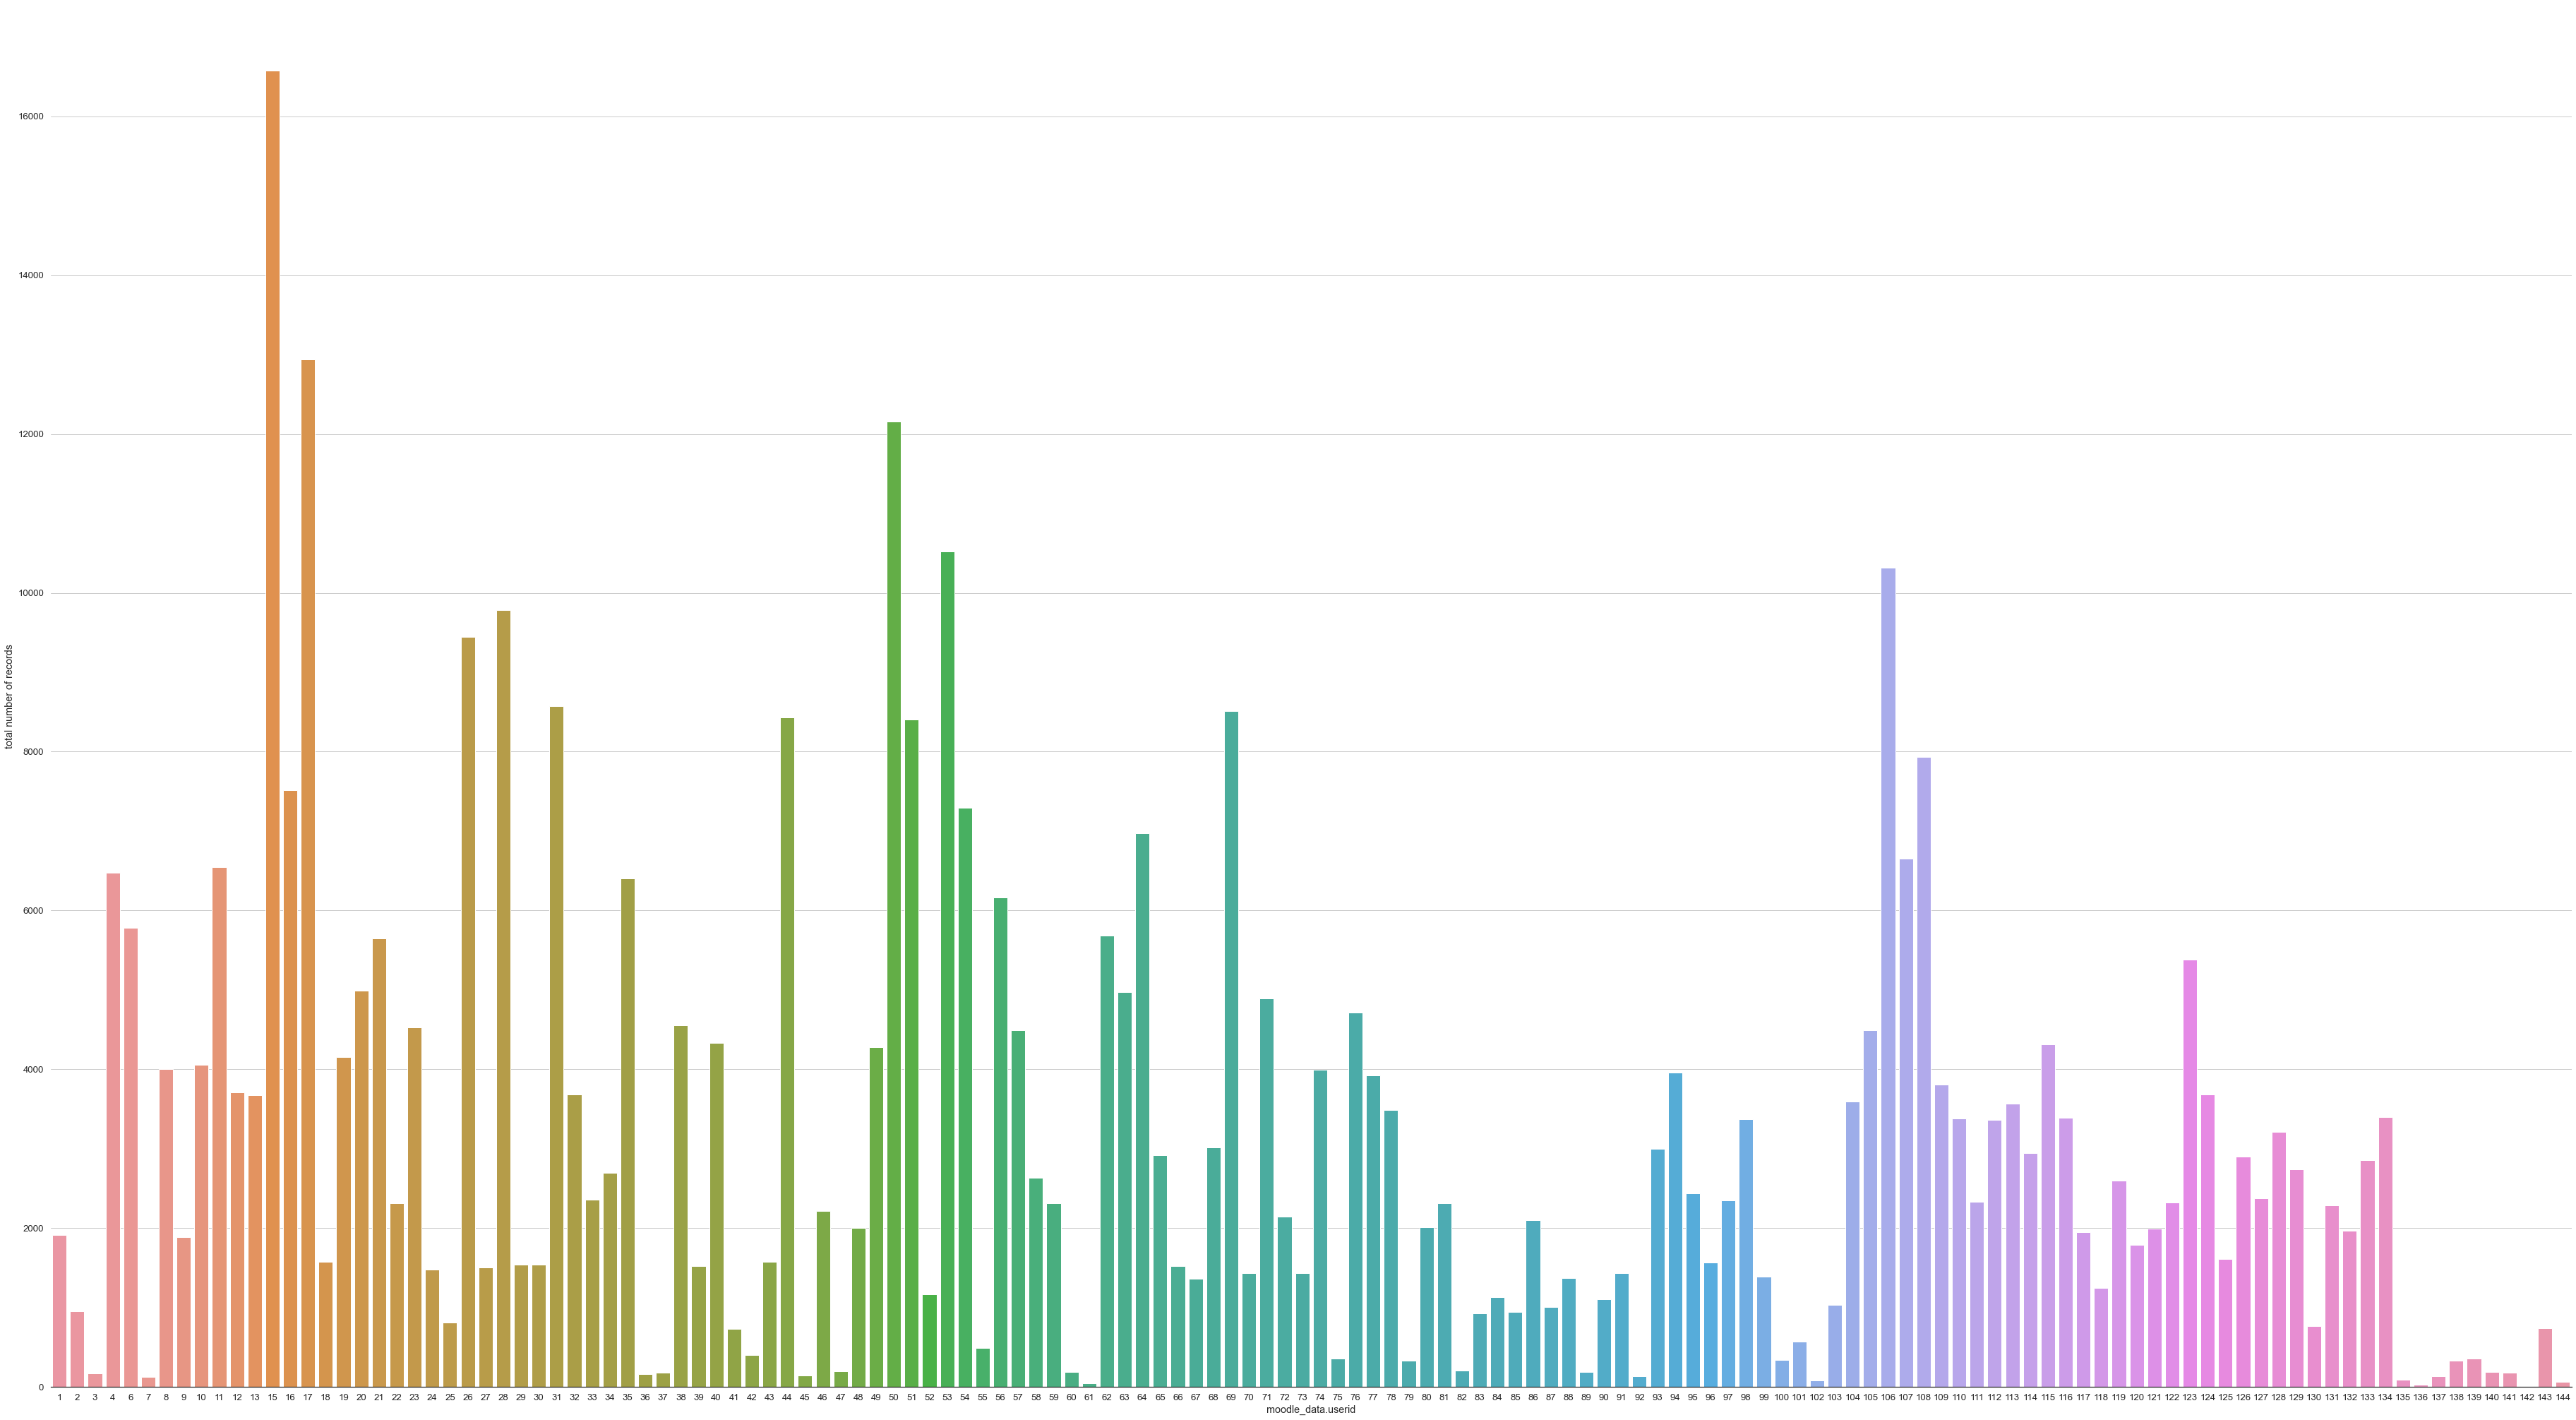

In [150]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(64, 36)) # Größe der Visualisierung (in inch)

# Visualisierung der Menge der viewed-Actions pro Benutzer
chart = sns.countplot(x=moodle_data.userid[moodle_data.action == 'viewed'], alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.userid')
chart.set_ylabel('total number of records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/Menge_der_viewed-Actions_pro_Benutzer.pdf', format='pdf')
plt.show()

&nbsp;
**Begrenzung der Selektion auf Benutzer in einem der offiziellen Studiengänge 1 bis 4**

In [151]:
# Gegenstand der Untersuchungen sind nur Datensätze mit einer Studiengangskennziffer größer als 0. Damit werden jene
# Benutzer bei der Analyse nicht beachtet, die nicht in einem der offiziellen Studiengänge 1 bis 4 aktiv waren.
moodle_data = moodle_data[moodle_data.Studiengang.astype(int) > 0]
moodle_data

,courseid,Studiengang,userid,userstatus,relateduserid,relateduserstatus,action,eventname,objecttable,objectid,timecreated,course_module_type,instanceid
52,27739,4,4,other,0,none,viewed,\core\event\course_viewed,,0,2020-10-12 07:55:24,,0
53,27739,4,4,other,0,none,viewed,\core\event\course_viewed,,0,2020-10-12 07:55:27,,0
54,27739,4,4,other,0,none,updated,\core\event\course_module_updated,course_modules,919569,2020-10-12 07:56:11,label,76620
55,27739,4,4,other,0,none,viewed,\core\event\course_viewed,,0,2020-10-12 07:56:11,,0
56,27739,4,4,other,0,none,viewed,\core\event\course_viewed,,0,2020-10-12 07:57:07,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
969003,28512,3,109,student,109,student,created,\mod_forum\event\discussion_subscription_created,forum_discussion_subs,45244,2021-06-03 21:11:23,,0
969004,28512,3,109,student,0,none,viewed,\mod_forum\event\course_module_viewed,forum,125767,2021-06-03 21:11:23,,0
969005,28512,3,109,student,109,student,deleted,\mod_forum\event\discussion_subscription_deleted,forum_discussion_subs,45244,2021-06-03 21:11:35,,0
969006,28512,3,109,student,0,none,viewed,\core\event\course_viewed,,0,2021-06-03 21:12:09,,0


In [152]:
# Überprüfung der Benutzeranzahl
users = moodle_data.userid.nunique()
display(users)

129

&nbsp;
**Begrenzung der Selektion auf Benutzer in Fachkursen der offiziellen Studiengänge 1 bis 4**

In [153]:
# Gegenstand der Untersuchungen sind nur Datensätze mit einer courseid größer oder gleich 27040. Damit werden nur jene
# Benutzer bei der Analyse beachtet, die auch in einem der Fachkurse des relevanten Untersuchungszeitraums aktiv waren.
moodle_data = moodle_data[moodle_data.courseid >= 27040]
moodle_data

,courseid,Studiengang,userid,userstatus,relateduserid,relateduserstatus,action,eventname,objecttable,objectid,timecreated,course_module_type,instanceid
52,27739,4,4,other,0,none,viewed,\core\event\course_viewed,,0,2020-10-12 07:55:24,,0
53,27739,4,4,other,0,none,viewed,\core\event\course_viewed,,0,2020-10-12 07:55:27,,0
54,27739,4,4,other,0,none,updated,\core\event\course_module_updated,course_modules,919569,2020-10-12 07:56:11,label,76620
55,27739,4,4,other,0,none,viewed,\core\event\course_viewed,,0,2020-10-12 07:56:11,,0
56,27739,4,4,other,0,none,viewed,\core\event\course_viewed,,0,2020-10-12 07:57:07,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
969003,28512,3,109,student,109,student,created,\mod_forum\event\discussion_subscription_created,forum_discussion_subs,45244,2021-06-03 21:11:23,,0
969004,28512,3,109,student,0,none,viewed,\mod_forum\event\course_module_viewed,forum,125767,2021-06-03 21:11:23,,0
969005,28512,3,109,student,109,student,deleted,\mod_forum\event\discussion_subscription_deleted,forum_discussion_subs,45244,2021-06-03 21:11:35,,0
969006,28512,3,109,student,0,none,viewed,\core\event\course_viewed,,0,2021-06-03 21:12:09,,0


In [154]:
# Überprüfung der Benutzeranzahl
users = moodle_data.userid.nunique()
display(users)

123

### Datenaufbereitung: Erstellung eigener Datensets für Studenten und Andere

In [155]:
md = moodle_data # Umbenennung der Variable, um den Code zu verkürzen

In [156]:
records_students = [md[md.userid == 1],
                    md[md.userid == 13],
                    md[md.userid == 18],
                    md[md.userid == 19],
                    md[md.userid == 20],
                    md[md.userid == 22],
                    md[md.userid == 23],
                    md[md.userid == 24],
                    md[md.userid == 25],
                    md[md.userid == 38]]
md_students = pd.concat(records_students)
md_students

,courseid,Studiengang,userid,userstatus,relateduserid,relateduserstatus,action,eventname,objecttable,objectid,timecreated,course_module_type,instanceid
25864,27583,4,1,student,-2,other,viewed,\core\event\user_profile_viewed,user,39709,2020-11-16 16:59:01,,0
26190,27583,4,1,student,0,none,viewed,\core\event\course_viewed,,0,2020-10-12 03:55:03,,0
26191,27583,4,1,student,0,none,viewed,\mod_forum\event\course_module_viewed,forum,120548,2020-10-12 03:55:06,,0
26192,27583,4,1,student,0,none,viewed,\mod_forum\event\discussion_viewed,forum_discussions,318592,2020-10-12 03:55:19,,0
26193,27583,4,1,student,0,none,viewed,\mod_forum\event\discussion_viewed,forum_discussions,318577,2020-10-12 04:03:42,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
958888,28236,1,38,student,0,none,viewed,\core\event\course_viewed,,0,2021-06-01 20:47:38,,0
958889,28236,1,38,student,0,none,viewed,\mod_scheduler\event\booking_form_viewed,scheduler,101,2021-06-01 20:47:47,,0
967269,28482,1,38,student,0,none,viewed,\core\event\course_viewed,,0,2021-06-03 10:24:49,,0
967310,28482,1,38,student,0,none,viewed,\core\event\course_viewed,,0,2021-06-03 11:05:12,,0


In [157]:
records_others = [md[md.userid == 2],
                  md[md.userid == 4],
                  md[md.userid == 6],
                  md[md.userid == 9],
                  md[md.userid == 10],
                  md[md.userid == 11],
                  md[md.userid == 27],
                  md[md.userid == 28],
                  md[md.userid == 29],
                  md[md.userid == 32]]
md_others = pd.concat(records_others)
md_others

,courseid,Studiengang,userid,userstatus,relateduserid,relateduserstatus,action,eventname,objecttable,objectid,timecreated,course_module_type,instanceid
8968,27583,4,2,other,0,none,uploaded,\mod_forum\event\assessable_uploaded,forum_posts,763049,2020-10-12 06:48:33,,0
8969,27583,4,2,other,0,none,created,\mod_forum\event\post_created,forum_posts,763049,2020-10-12 06:48:33,,0
8970,27583,4,2,other,0,none,viewed,\mod_forum\event\discussion_viewed,forum_discussions,318577,2020-10-12 06:48:33,,0
8975,27583,4,2,other,0,none,viewed,\core\event\course_viewed,,0,2020-10-12 07:01:23,,0
8976,27583,4,2,other,0,none,viewed,\mod_forum\event\course_module_viewed,forum,120546,2020-10-12 07:01:26,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
967383,28223,4,32,other,0,none,viewed,\mod_url\event\course_module_viewed,url,232847,2021-06-03 11:45:03,,0
967387,28223,4,32,other,0,none,viewed,\core\event\course_viewed,,0,2021-06-03 11:47:34,,0
967388,28223,4,32,other,0,none,viewed,\core\event\course_viewed,,0,2021-06-03 11:47:36,,0
967389,28223,4,32,other,0,none,updated,\core\event\course_module_updated,course_modules,942936,2021-06-03 11:47:51,url,232847


### Datenanalyse: Untersuchung der Aktivitäten von Studenten und Anderen

In [158]:
# Ermittlung der Menge der Log-Einträge pro Action für Studenten
students_actions = md_students.action.groupby(md.action).count()
display(students_actions)

action
accepted         28
added            21
created         392
deleted          46
downloaded        2
duplicated        1
ended             4
graded          106
joined          127
left             15
removed           2
reviewed         94
searched          4
started         214
submitted       443
updated          88
uploaded        344
viewed        22718
Name: action, dtype: int64

In [159]:
# Ermittlung der Menge der Log-Einträge pro Action für Andere
others_actions = md_others.action.groupby(md.action).count()
display(others_actions)

action
abandoned         2
accepted          3
added           403
created        2248
deleted         303
downloaded      170
ended             6
evaluated       348
exported          4
graded         2304
granted          15
joined           26
left             20
moved             2
regraded          3
removed          32
restored          2
reviewed         93
searched         12
started          66
submitted         3
switched         16
updated        5106
uploaded        743
viewed        26185
Name: action, dtype: int64

&nbsp;
**Erstellung eines kombinierten Datensets für Studenten und Andere**

In [160]:
# Erstellung eines kombinierten Datensets für Studenten und Andere
users_actions = pd.concat([students_actions, others_actions], axis=1, keys=['students', 'others']).sort_index()

# Ersetzung von NaN-Werten durch den Wert 0
users_actions = users_actions.fillna(0)

# Ausgabe des kombinierten Datensets
display(users_actions)

,students,others
action,,
abandoned,0.0,2.0
accepted,28.0,3.0
added,21.0,403.0
created,392.0,2248.0
deleted,46.0,303.0
downloaded,2.0,170.0
duplicated,1.0,0.0
ended,4.0,6.0
evaluated,0.0,348.0


&nbsp;
**Visualisierung des kombinierten Datensets für Studenten und Andere**

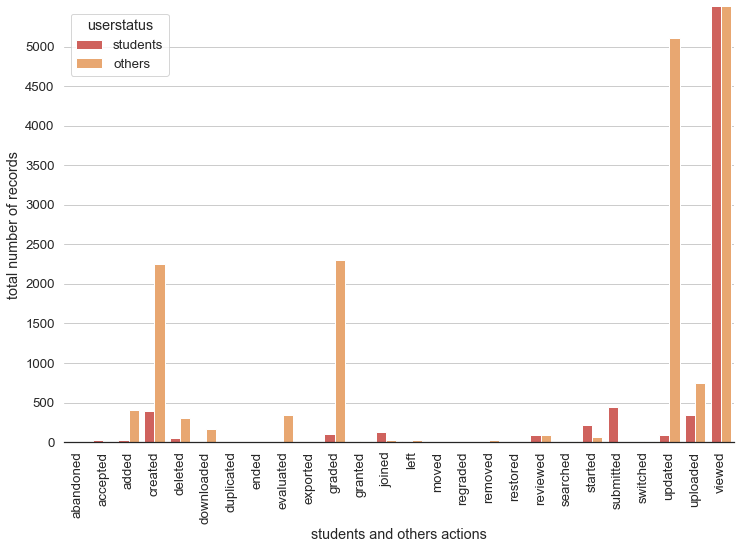

In [161]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(12, 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Action für Studenten und Andere
result = users_actions.stack().reset_index().set_index('action').rename(columns={'level_1': 'students', 0: 'others'})
chart = sns.barplot(x=result.index, y='others', data=result, hue='students')

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('students and others actions')
chart.set_ylabel('total number of records')
chart.yaxis.set_ticks(range(0, 5500, 500))
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
plt.ylim(0, 5500)
plt.legend(loc='upper left', title='userstatus')
# plt.savefig('charts/Menge_der_Log-Eintraege_pro_Aktivitaet_und_Benutzergruppe.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Action nur für Studenten**

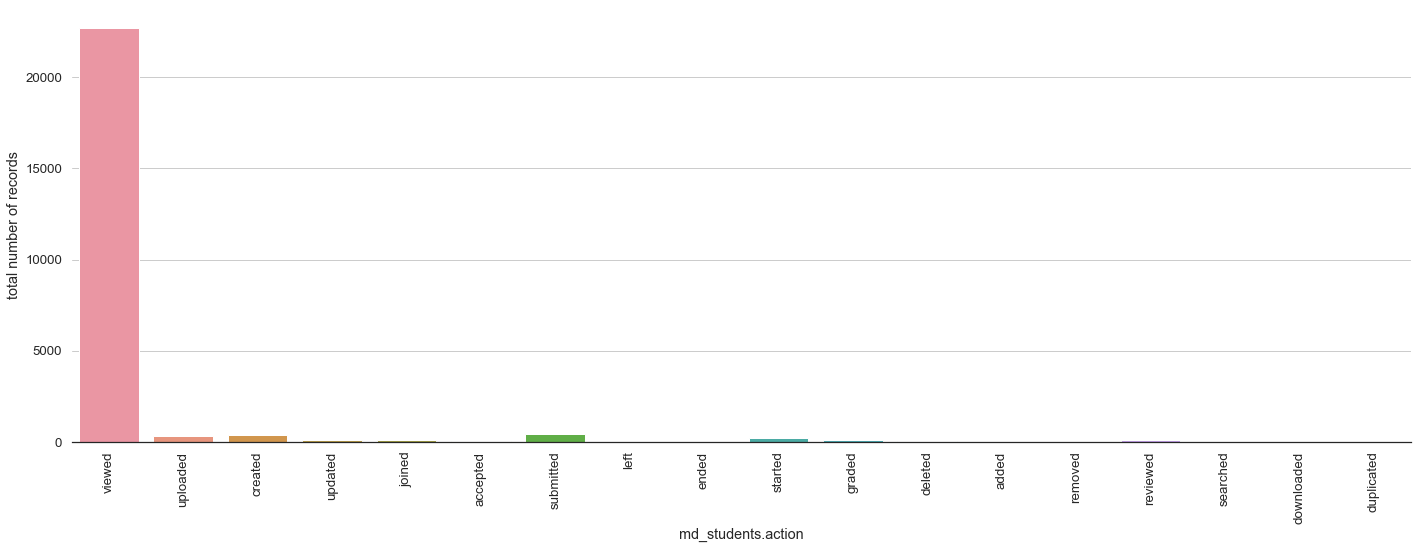

In [162]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Action nur für Studenten
chart = sns.countplot(x=md_students.action)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('md_students.action')
chart.set_ylabel('total number of records')
chart.yaxis.set_ticks(range(0, 25000, 5000))
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Action nur für Andere**

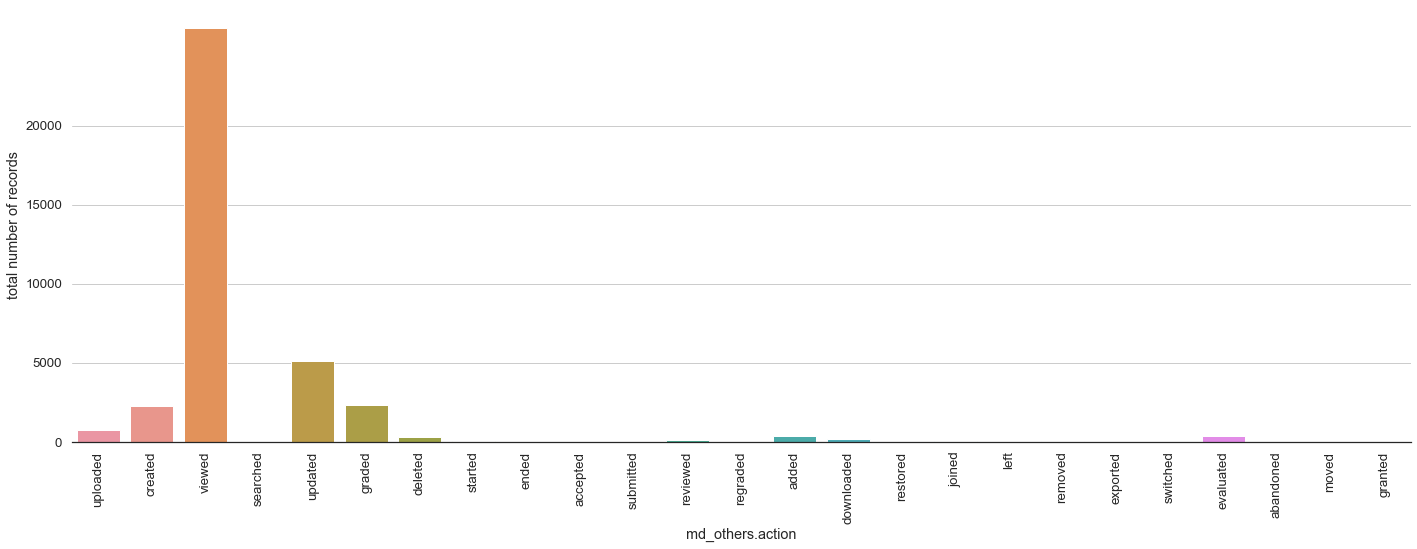

In [163]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Action nur für Andere
chart = sns.countplot(x=md_others.action)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('md_others.action')
chart.set_ylabel('total number of records')
chart.yaxis.set_ticks(range(0, 25000, 5000))
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Studenten und der von ihnen ausgeführten Aktivitäten**

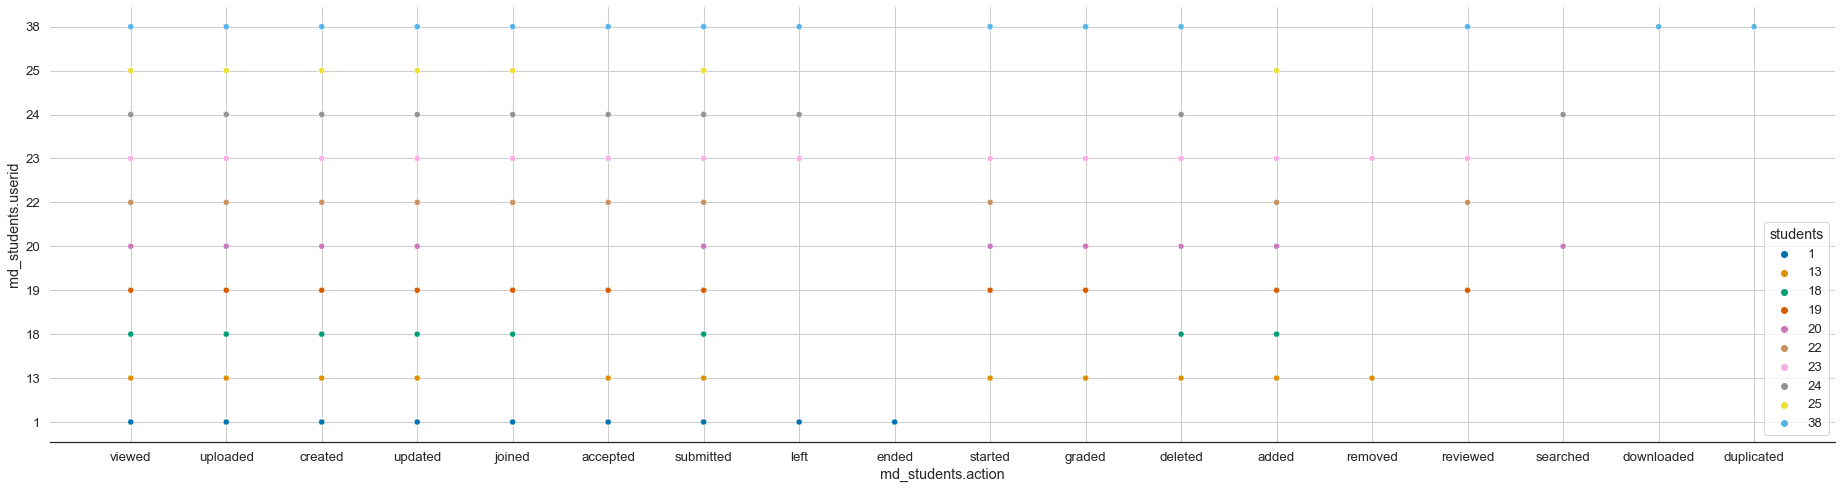

In [164]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(32, 8)) # Größe der Visualisierung (in inch)

# Visualisierung der Studenten und der von ihnen ausgeführten Aktivitäten
chart = sns.scatterplot(x=md_students.action, y=md_students.userid.astype(str), hue=md_students.userid, palette='colorblind')

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='both')
chart.set_axisbelow(True)
chart.set_xlabel('md_students.action')
chart.set_ylabel('md_students.userid')
chart.invert_yaxis()
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
plt.legend(loc='lower right', title='students')
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Anderen und der von ihnen ausgeführten Aktivitäten**

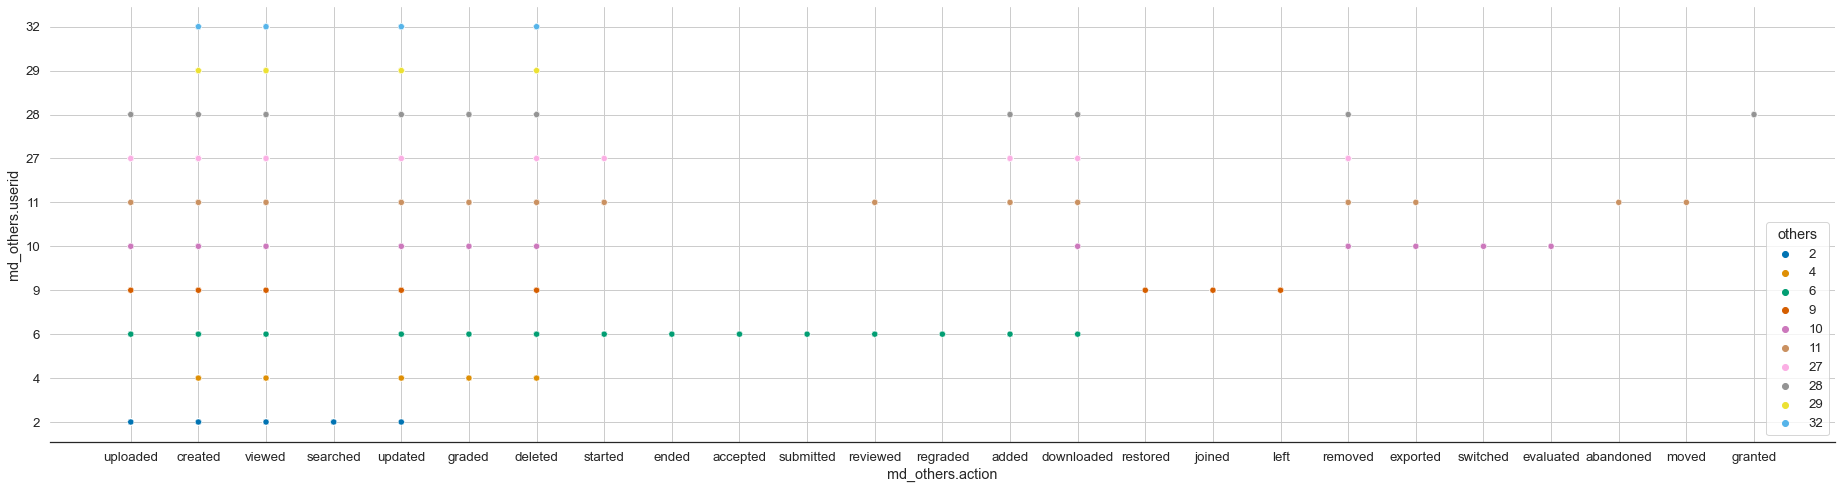

In [165]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(32, 8)) # Größe der Visualisierung (in inch)

# Visualisierung der Anderen und der von ihnen ausgeführten Aktivitäten
chart = sns.scatterplot(x=md_others.action, y=md_others.userid.astype(str), hue=md_others.userid, palette='colorblind')

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='both')
chart.set_axisbelow(True)
chart.set_xlabel('md_others.action')
chart.set_ylabel('md_others.userid')
chart.invert_yaxis()
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
plt.legend(loc='lower right', title='others')
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Erstellung eines Datensets nur für Aktivitäten von Studenten**

In [166]:
specified_students_actions = [md_students[md_students.action == 'added'],
                              md_students[md_students.action == 'created'],
                              md_students[md_students.action == 'deleted'],
                              md_students[md_students.action == 'evaluated'],
                              md_students[md_students.action == 'graded'],
                              md_students[md_students.action == 'updated'],
                              md_students[md_students.action == 'submitted']]  # List of your dataframes
specified_students_actions = pd.concat(specified_students_actions)
specified_students_actions

,courseid,Studiengang,userid,userstatus,relateduserid,relateduserstatus,action,eventname,objecttable,objectid,timecreated,course_module_type,instanceid
393403,27419,1,13,student,35,other,added,\mod_scheduler\event\booking_added,scheduler_slots,1708,2021-01-13 13:57:57,,0
393417,27419,1,13,student,35,other,added,\mod_scheduler\event\booking_added,scheduler_slots,1707,2021-01-13 13:58:18,,0
680059,28259,2,18,student,18,student,added,\core\event\group_member_added,groups,26118,2021-03-24 10:09:19,,0
826930,28264,2,18,student,141,other,added,\mod_scheduler\event\booking_added,scheduler_slots,2163,2021-05-06 17:29:10,,0
393524,27419,1,19,student,35,other,added,\mod_scheduler\event\booking_added,scheduler_slots,1707,2021-01-13 14:16:44,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
844133,28482,1,38,student,0,none,submitted,\mod_assign\event\assessable_submitted,assign_submission,567822,2021-05-11 10:42:42,,0
894145,28482,1,38,student,0,none,submitted,\mod_assign\event\assessable_submitted,assign_submission,576741,2021-05-20 07:59:54,,0
897275,28482,1,38,student,0,none,submitted,\mod_assign\event\assessable_submitted,assign_submission,576210,2021-05-21 06:38:01,,0
897298,28482,1,38,student,0,none,submitted,\mod_assign\event\assessable_submitted,assign_submission,576210,2021-05-21 06:39:41,,0


&nbsp;
**Erstellung eines Datensets nur für Aktivitäten von Anderen**

In [167]:
specified_others_actions = [md_others[md_others.action == 'added'],
                            md_others[md_others.action == 'created'],
                            md_others[md_others.action == 'deleted'],
                            md_others[md_others.action == 'evaluated'],
                            md_others[md_others.action == 'graded'],
                            md_others[md_others.action == 'updated'],
                            md_others[md_others.action == 'submitted']]  # List of your dataframes
specified_others_actions = pd.concat(specified_others_actions)
specified_others_actions

,courseid,Studiengang,userid,userstatus,relateduserid,relateduserstatus,action,eventname,objecttable,objectid,timecreated,course_module_type,instanceid
413468,27747,4,6,other,-2,other,added,\core\event\group_member_added,groups,24890,2021-01-17 11:44:00,,0
413528,27747,4,6,other,-2,other,added,\core\event\group_member_added,groups,24891,2021-01-17 18:32:19,,0
413530,27747,4,6,other,-2,other,added,\core\event\group_member_added,groups,24892,2021-01-17 18:32:19,,0
413532,27747,4,6,other,-2,other,added,\core\event\group_member_added,groups,24893,2021-01-17 18:32:19,,0
413534,27747,4,6,other,-2,other,added,\core\event\group_member_added,groups,24894,2021-01-17 18:32:19,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
966648,28223,4,32,other,0,none,updated,\core\event\course_module_updated,course_modules,942936,2021-06-03 11:47:51,url,232847
967389,28223,4,32,other,0,none,updated,\core\event\course_module_updated,course_modules,942936,2021-06-03 11:47:51,url,232847
397836,27747,4,6,other,0,none,submitted,\mod_assign\event\assessable_submitted,assign_submission,548374,2021-01-14 21:34:57,,0
398299,27747,4,6,other,0,none,submitted,\mod_assign\event\assessable_submitted,assign_submission,548374,2021-01-14 21:34:57,,0


&nbsp;
**Visualisierung der Menge der Log-Einträge pro Action für Studenten, gruppiert nach ausgewählten Aktivitäten**

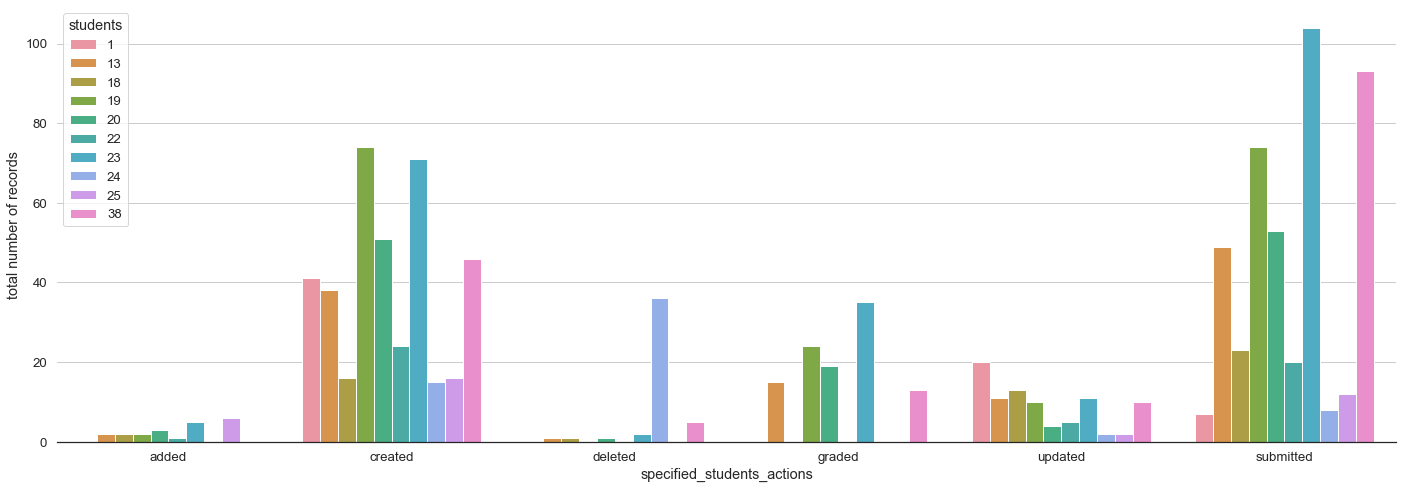

In [168]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8))  # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Action für Studenten, gruppiert nach ausgewählten Aktivitäten
chart = sns.countplot(x=specified_students_actions['action'], hue=specified_students_actions.userid)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('specified_students_actions')
chart.set_ylabel('total number of records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
plt.legend(loc='upper left', title='students')
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Action für Andere, gruppiert nach ausgewählten Aktivitäten**

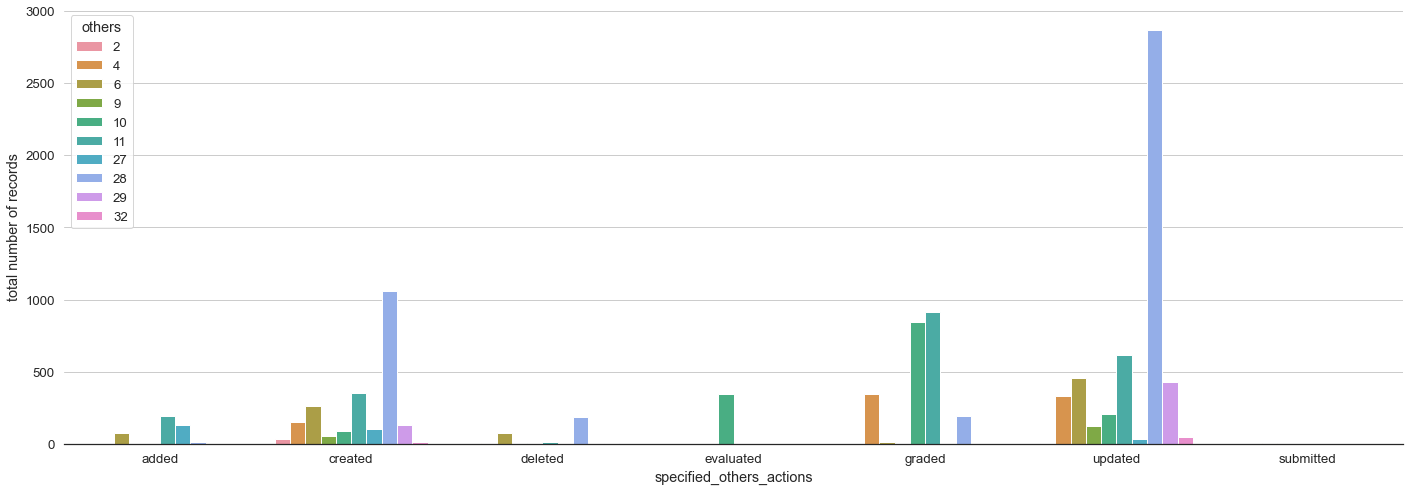

In [169]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8))  # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Action für Andere, gruppiert nach ausgewählten Aktivitäten
chart = sns.countplot(x=specified_others_actions['action'], hue=specified_others_actions.userid)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('specified_others_actions')
chart.set_ylabel('total number of records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
plt.legend(loc='upper left', title='others')
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Erstellung eines Datensets für Aktivitäten von Studenten und Anderen**

In [170]:
specified_users_actions = pd.concat([specified_others_actions, specified_students_actions])
specified_users_actions

,courseid,Studiengang,userid,userstatus,relateduserid,relateduserstatus,action,eventname,objecttable,objectid,timecreated,course_module_type,instanceid
413468,27747,4,6,other,-2,other,added,\core\event\group_member_added,groups,24890,2021-01-17 11:44:00,,0
413528,27747,4,6,other,-2,other,added,\core\event\group_member_added,groups,24891,2021-01-17 18:32:19,,0
413530,27747,4,6,other,-2,other,added,\core\event\group_member_added,groups,24892,2021-01-17 18:32:19,,0
413532,27747,4,6,other,-2,other,added,\core\event\group_member_added,groups,24893,2021-01-17 18:32:19,,0
413534,27747,4,6,other,-2,other,added,\core\event\group_member_added,groups,24894,2021-01-17 18:32:19,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
844133,28482,1,38,student,0,none,submitted,\mod_assign\event\assessable_submitted,assign_submission,567822,2021-05-11 10:42:42,,0
894145,28482,1,38,student,0,none,submitted,\mod_assign\event\assessable_submitted,assign_submission,576741,2021-05-20 07:59:54,,0
897275,28482,1,38,student,0,none,submitted,\mod_assign\event\assessable_submitted,assign_submission,576210,2021-05-21 06:38:01,,0
897298,28482,1,38,student,0,none,submitted,\mod_assign\event\assessable_submitted,assign_submission,576210,2021-05-21 06:39:41,,0


&nbsp;
**Visualisierung der Menge der Log-Einträge pro Action für Studenten und Andere, gruppiert nach ausgewählten Aktivitäten**

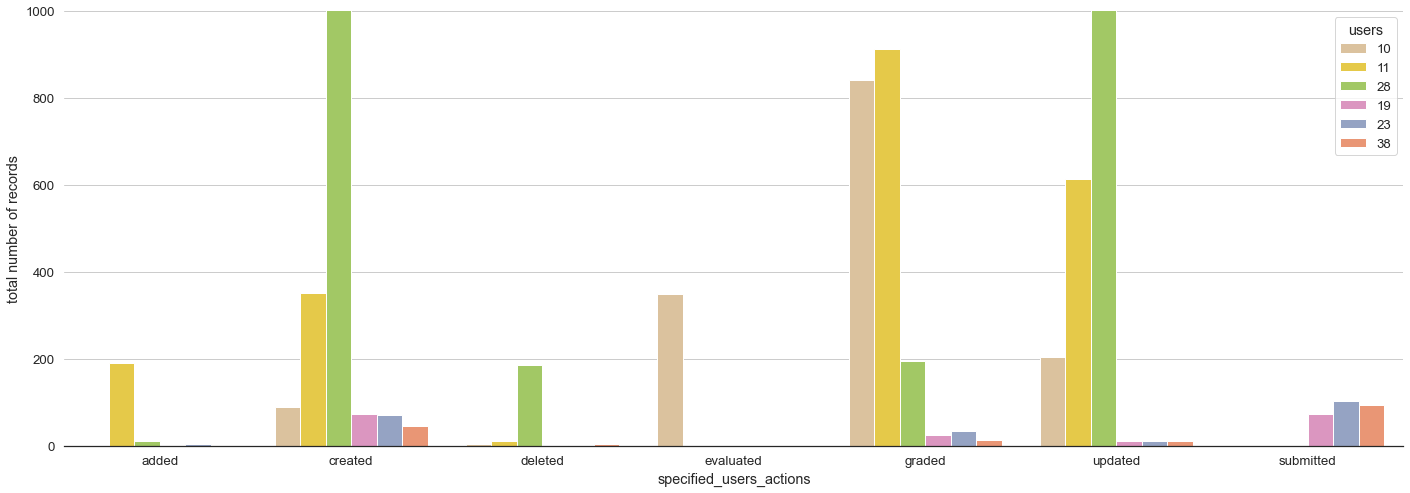

In [171]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8))  # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Action für Andere, gruppiert nach ausgewählten Aktivitäten
chart = sns.countplot(x=specified_users_actions['action'], hue=specified_users_actions.userid, hue_order=[10, 11, 28, 19, 23, 38], palette='Set2_r')

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('specified_users_actions')
chart.set_ylabel('total number of records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
plt.legend(loc='upper right', title='users')
plt.ylim(0, 1000)
# plt.savefig('charts/Evaluierung_Identifikation_Log-Eintraege_pro_Aktivitaet_Studenten_Andere.pdf', format='pdf')
plt.show()